## Import TensorFlow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.20.0


In [4]:
pip install kagglehub


   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 68.8M/68.8M [00:14<00:00, 4.93MB/s]

Extracting files...


Path to dataset files: C:\Users\range\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4


In [6]:
mnist = tf.keras.datasets.fashion_mnist

In [7]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

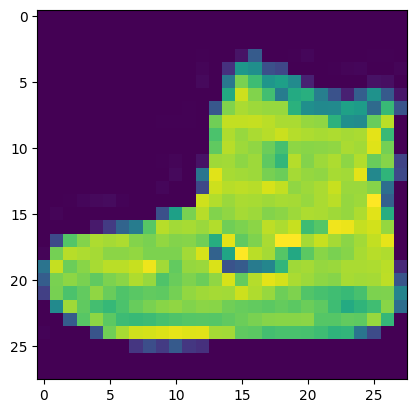

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [9]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Design the model
Now design the model. You'll have three layers. Go through them one-by-one and explore the different types of layers and the parameters used for each.

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

- Sequential defines a sequence of layers in the neural network.
- Flatten takes a square and turns it into a one-dimensional vector.
- Dense adds a layer of neurons.
- Activation functions tell each layer of neurons what to do. There are lots of options, but use these for now:
- Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
- Softmax takes a set of values, and effectively picks the biggest one. For example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, - 9.5, 0.1, 0.05, 0.05, 0.05], then it saves you from having to sort for the largest value—it returns [0,0,0,0,1,0,0,0,0].

In [11]:
print (model)

<Sequential name=sequential, built=False>


### Compile and train the model
Now that the model is defined, the next thing to do is build it. Create a model by first compiling it with an optimizer and loss function, then train it on your training data and labels. The goal is to have the model figure out the relationship between the training data and its training labels. Later, you want your model to see data that resembles your training data, then make a prediction about what that data should look like.

Notice the use of metrics= as a parameter, which allows TensorFlow to report on the accuracy of the training by checking the predicted results against the known answers (the labels).

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8250 - loss: 0.4958
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8675 - loss: 0.3714
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8774 - loss: 0.3359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8853 - loss: 0.3100
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8925 - loss: 0.2933


When the model is done training, you will see an accuracy value at the end of the final epoch. It might look something like 0.8926 as above. This tells you that your neural network is about 89% accurate in classifying the training data. In other words, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for five epochs and done quickly.

### Test the model
How would the model perform on data it hasn't seen? That's why you have the test set. You call model.evaluate and pass in the two sets, and it reports the loss for each. Give it a try:

In [13]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8732 - loss: 0.3533


[0.35326385498046875, 0.873199999332428]

That example returned an accuracy of .8789, meaning it was about 88% accurate. (You might have slightly different values.)

As expected, the model is not as accurate with the unknown data as it was with the data it was trained on! As you learn more about TensorFlow, you'll find ways to improve that.

To explore further, try the exercises in the next step.

### Exploration exercises
Exercise 1
For this first exercise, run the following code:

In [15]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[4.7358668e-07 9.6471864e-10 2.5563196e-07 1.6630741e-08 1.5867616e-07
 7.8960331e-03 3.0358767e-06 7.3345127e-03 4.9973169e-06 9.8476046e-01]


In [16]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.20.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 3.8973
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.5319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.5045
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4973
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.4980
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5636
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3.6622944e-11 8.3275535e-07 4.6691532e-14 8.9012471e-11 1.1695225e-10
 4.3517759e-01 7.1797672e-12 1.2622091e-01 1.1601363e-05 4.3858907e-01]
9


### Explore callbacks
Earlier, when you trained for extra epochs, you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that and you might have thought that it'd be nice if you could stop the training when you reach a desired value, such as 95% accuracy. If you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?

Like any other program, you have callbacks! See them in action:

In [18]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8317 - loss: 0.4724
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8694 - loss: 0.3565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8841 - loss: 0.3222
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8898 - loss: 0.2987
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8963 - loss: 0.2794


## The End !!